# Physical Models of Living Systems: Homework 5 - Hopfield networks
Laura Schulze (2122311)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import hopfield_funcs as HF

Let's start by training the network on 2 patterns:

Reading images and converting to binary patterns...


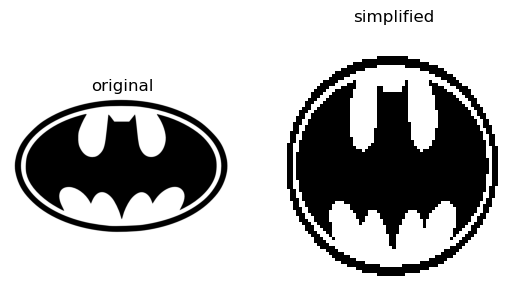

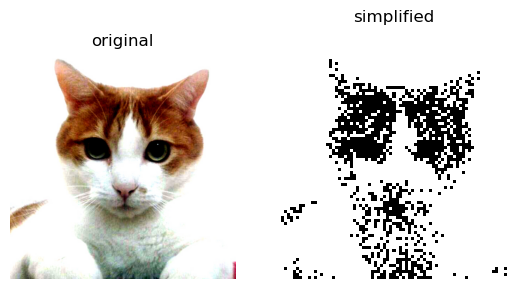

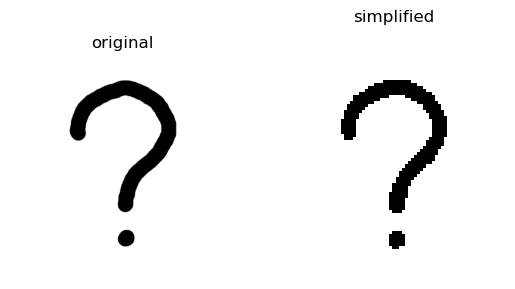

Done!
The network is learning...
pattern  0
pattern  1
pattern  2
Done!


In [2]:
img_dims = 75
stored_files = ["images/stored/batman.png", "images/stored/cat.jpg", "images/stored/qm.png"]
mynet = HF.train_Hopfield_network(img_dims,stored_files, showImages=True)

## Cat

In [3]:
testfiles = [f"images/inputs/cat{i}.jpg" for i in (2, 3)]
for i, t in enumerate(testfiles):
    HF.run_and_animate(mynet, t, img_dims, anim_filename = f"images/outputs/cat{i+2}_evolution.gif")

input image | evolution
- | - 
![](images/inputs/cat2.jpg) | ![](images/outputs/cat2_evolution.gif)
![](images/inputs/cat3.jpg) | ![](images/outputs/cat3_evolution.gif)

## Batman

In [4]:
testfiles = [f"images/inputs/batman{i}.png" for i in range(6)]
testfiles += ["images/inputs/superman.jpg"]
for i, t in enumerate(testfiles):
    HF.run_and_animate(mynet, t, img_dims, anim_filename = f"images/outputs/batman{i}_evolution.gif")

input image | evolution
- | - 
![](images/inputs/batman0.png) | ![](images/outputs/batman0_evolution.gif)
![](images/inputs/batman1.png) | ![](images/outputs/batman1_evolution.gif)
![](images/inputs/batman2.png) | ![](images/outputs/batman2_evolution.gif)
![](images/inputs/batman3.png) | ![](images/outputs/batman3_evolution.gif)
![](images/inputs/batman4.png) | ![](images/outputs/batman4_evolution.gif)
![](images/inputs/batman5.png) | ![](images/outputs/batman5_evolution.gif)
![](images/inputs/superman.jpg) | ![](images/outputs/batman6_evolution.gif)


## Spurious solutions

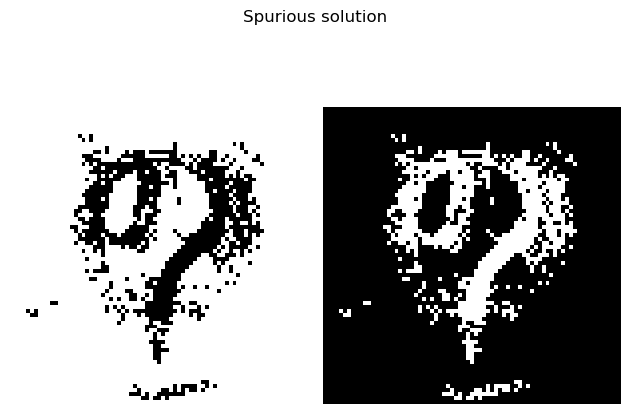

In [5]:
import matplotlib.image as img

stored_patterns = [2*img.imread("%s_converted.png"%fname)-1 for fname in stored_files]
spurious = np.sign(np.sum(stored_patterns, axis=0))

fig, ax = plt.subplots(ncols=2, tight_layout=True)
ax[0].matshow(spurious, cmap=plt.cm.gray)
ax[1].matshow(-spurious, cmap=plt.cm.gray)
ax[0].axis('off')
ax[1].axis('off')
fig.suptitle("Spurious solution")
plt.show()

Analysing image similarity

In [6]:
import matplotlib.image as img

test_images = [f"images/inputs/cat{i}.jpg" for i in (2, 3)]
test_images += [f"images/inputs/batman{i}.png" for i in range(6)]
test_images += ["images/inputs/superman.jpg"]

test_patterns = [HF.readPatterns(fname, [img_dims, img_dims]).astype(int) for fname in test_images]
ref_patterns = [HF.readPatterns(fname, [img_dims, img_dims]).astype(int) for fname in stored_files]
ref_patterns += [spurious.flatten().astype(int)]
ref_labels = stored_files + ["spurious solution"]

N = img_dims**2
similarity_dict={}
for j, tp in enumerate(test_patterns):
    tp_dict = {}
    for i, rp in enumerate(ref_patterns):
        diff =  np.sum(tp != rp)
        similarity = 1-diff/N
        if similarity < 0.5: # image is closer to flipped sign pattern
            similarity = 1- similarity 
            print("INVERSION")
            print(f"{test_images[j]} and -{ref_labels[i]} (flipped sign) differ by {N-diff} pixels,")
            print(f"Corresponding to a {similarity*100:.2f}% match\n")
            tp_dict["-"+ref_labels[i]] = similarity
        else:
            tp_dict[ref_labels[i]] = similarity
            print(f"{test_images[j]} and {ref_labels[i]} differ by {diff} pixels,")
            print(f"Corresponding to a {similarity*100:.2f}% match\n")
    similarity_dict[test_images[j]] = tp_dict

images/inputs/cat2.jpg and images/stored/batman.png differ by 2464 pixels,
Corresponding to a 56.20% match

images/inputs/cat2.jpg and images/stored/cat.jpg differ by 981 pixels,
Corresponding to a 82.56% match

images/inputs/cat2.jpg and images/stored/qm.png differ by 628 pixels,
Corresponding to a 88.84% match

images/inputs/cat2.jpg and spurious solution differ by 812 pixels,
Corresponding to a 85.56% match

images/inputs/cat3.jpg and images/stored/batman.png differ by 2657 pixels,
Corresponding to a 52.76% match

images/inputs/cat3.jpg and images/stored/cat.jpg differ by 1062 pixels,
Corresponding to a 81.12% match

images/inputs/cat3.jpg and images/stored/qm.png differ by 515 pixels,
Corresponding to a 90.84% match

images/inputs/cat3.jpg and spurious solution differ by 871 pixels,
Corresponding to a 84.52% match

images/inputs/batman0.png and images/stored/batman.png differ by 1567 pixels,
Corresponding to a 72.14% match

images/inputs/batman0.png and images/stored/cat.jpg differ

In [7]:
for test_img, ref_scores in similarity_dict.items():
    best_ref, best_score = max(ref_scores.items(), key=lambda x: x[1])
    print(f"{test_img}: best match is '{best_ref}' ({best_score*100:.2f}% similarity)\n")

images/inputs/cat2.jpg: best match is 'images/stored/qm.png' (88.84% similarity)

images/inputs/cat3.jpg: best match is 'images/stored/qm.png' (90.84% similarity)

images/inputs/batman0.png: best match is 'spurious solution' (77.37% similarity)

images/inputs/batman1.png: best match is '-spurious solution' (77.37% similarity)

images/inputs/batman2.png: best match is 'images/stored/batman.png' (65.62% similarity)

images/inputs/batman3.png: best match is 'images/stored/batman.png' (87.38% similarity)

images/inputs/batman4.png: best match is '-images/stored/batman.png' (87.38% similarity)

images/inputs/batman5.png: best match is 'images/stored/qm.png' (82.72% similarity)

images/inputs/superman.jpg: best match is 'spurious solution' (74.81% similarity)



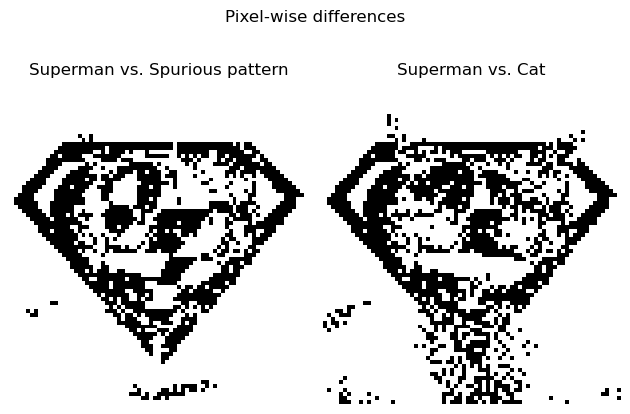

In [8]:
superman_pattern = HF.readPatterns("images/inputs/superman.jpg", [img_dims, img_dims]).reshape(img_dims, img_dims).astype(int)
cat_pattern = HF.readPatterns("images/stored/cat.jpg", [img_dims, img_dims]).reshape(img_dims, img_dims).astype(int)
spurious_pattern = spurious.astype(int)
fig, ax = plt.subplots(ncols=2, tight_layout=True)
ax[0].matshow(superman_pattern == spurious_pattern, cmap=plt.cm.gray)
ax[0].set_title("Superman vs. Spurious pattern")
ax[1].matshow(superman_pattern == cat_pattern, cmap=plt.cm.gray)
ax[1].set_title("Superman vs. Cat")
ax[0].axis('off')
fig.suptitle("Pixel-wise differences")
ax[1].axis('off')
plt.show()